In [ ]:
import numpy as np 
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
import sklearn.utils
import sklearn.preprocessing as pr
%matplotlib inline 

## Generate Data

In [389]:
np.random.seed(1)

X1=np.random.randn(100)*1+7.8

X2=np.random.randn(100)*1+5

## let's Plot the samples to see the diffrences

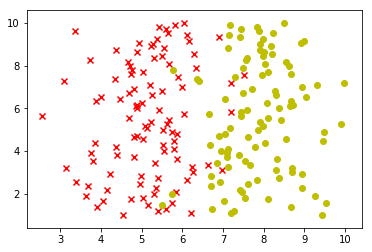

In [390]:
fig=plt.figure()
plt.scatter(X2,np.linspace(np.min(X),np.max(X),100),c='r',marker='x')
plt.scatter(X1,np.linspace(np.min(X),np.max(X),100),c='y',marker='o')


 
 
###    some concatenation and fit intercept

In [393]:
y=np.array([0]*100+[1]*100)

X=np.concatenate((X1,X2),axis=0) #concatenate or hstack in numpy as you like

#X=pr.scale(X)  #  if you want to scale but as is there only one feature does'nt matter 

X=X.reshape(200,1)

#add the column of ones
intercept = np.ones((X.shape[0],1)) 
X=np.hstack((intercept, X))

##  How i did it

In [404]:
def logistic(x):
    return 1/(1+np.exp(-x))

def cost(h,y):
    return  -(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))

def Lg(X,y,alpha=0.1,iteration=100000):
    m=y.size
    theta=np.ones(X.shape[1])
    
    for i in range(iteration):
        z=np.dot(X,theta)
        hypo=logistic(z)
        if i%50000==0:
            print(cost(hypo,y))
        gradient=np.dot(X.T,(hypo-y))/m
        theta -= alpha*gradient
    return theta

## How a dude from internet did it  

In [396]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose=True
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        print(X.shape)
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 50000 == 0):
                print('floss: ',self.__loss(h, y))
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

## comparaison 
  ### between  implementation from scratch and sklearn 

In [397]:
model = LogisticRegression(lr=0.1,fit_intercept=False ,verbose=True)
%time model.fit(X, y)

(200, 2)
floss:  0.6931471805599452
floss:  0.16641978193066287
CPU times: user 12.7 s, sys: 6.68 ms, total: 12.7 s
Wall time: 12.7 s


In [399]:
%time theta=Lg(X,y)

886.4137221217308
33.28378506524783
CPU times: user 12.4 s, sys: 16.1 ms, total: 12.4 s
Wall time: 12.5 s


## Scikit-learn 

In [400]:
from  sklearn.linear_model import LogisticRegression
modSK=LogisticRegression(fit_intercept=False,C=1e25)
%time modSK.fit(X,y)

CPU times: user 4.19 ms, sys: 0 ns, total: 4.19 ms
Wall time: 3.37 ms


LogisticRegression(C=1e+25, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
###  sklearn is away so much pretty faster

In [401]:
model.theta

array([20.80682446, -3.1883471 ])

In [402]:
theta

array([20.80706462, -3.18838342])

## little bit closer so it needs a number of iteration a little bit larger

In [403]:
modSK.coef_

array([[20.86030089, -3.19643319]])